### Imports

In [4]:

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
import seaborn as sns

# Problem Statement

We  will use the `Boston` housing data set, which is contained in the `ISLP` package.  


The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods
around Boston.  We will build a regression model to predict  `medv`  using $13$
predictors such as  `rm`  (average number of rooms per house),
 `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of
households with low socioeconomic status). 

 We will use `statsmodels` for this
task, a `Python` package that implements several commonly used
regression methods.

In [5]:
boston = load_data("Boston")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Data EDA

## Plot Pairwise Correlations

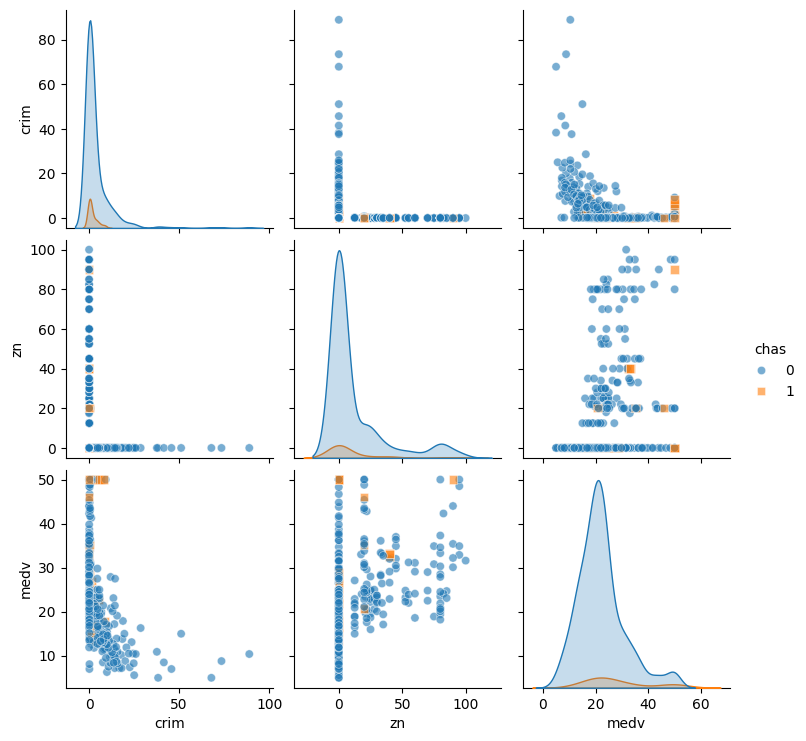

In [17]:
sns.pairplot(boston, vars=["crim", "zn", "medv"], hue="chas", markers=["o", "s"],  plot_kws={"alpha": 0.6})

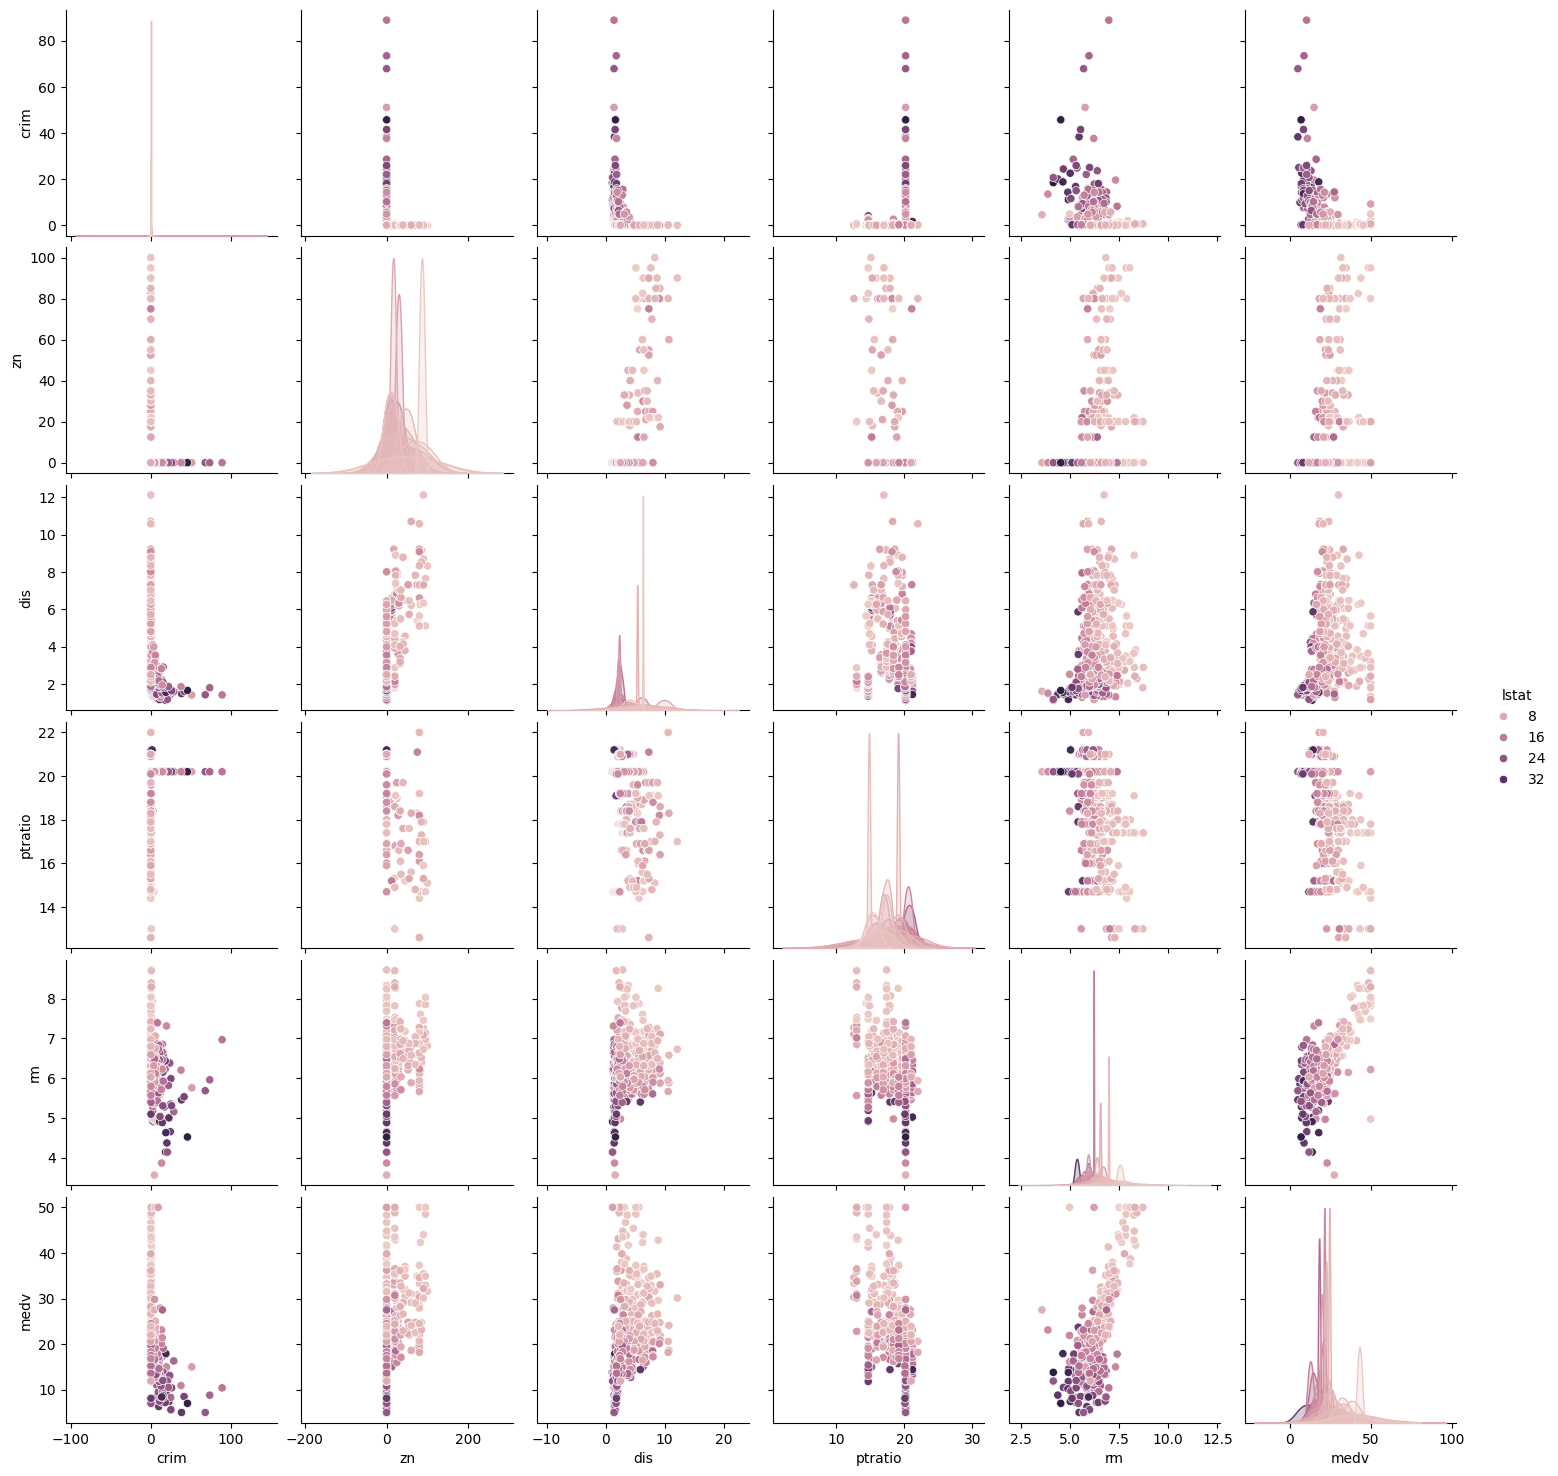

In [27]:
sns.pairplot(boston[boston["chas"] == 0], vars=["crim", "zn", "dis", "ptratio", "rm", "medv"], hue="lstat")

## Observations
1. There is no crime in `zn > 0`. There can be a hierarchical model, stratified on `zn`. (one for z == 0 , and another for zn>0).
2. Exponential decrease in max housing price as `crim` increase
3. Strong relationship of `rm` to `medv`.
4. Significant relationship with `lstat` and `dis`.
5. There seems to be *low amount of  data* for `chas=1`.

# Model

## Train Test Split

In [29]:
feat_cols = [col for col in boston if col != "medv"]
label_col = "medv"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston[feat_cols], boston[label_col], test_size=0.2)

In [31]:
y_train

231    31.7
172    23.1
14     18.2
367    23.1
126    15.7
       ... 
382    11.3
396    12.5
141    14.4
439    12.8
316    17.8
Name: medv, Length: 404, dtype: float64

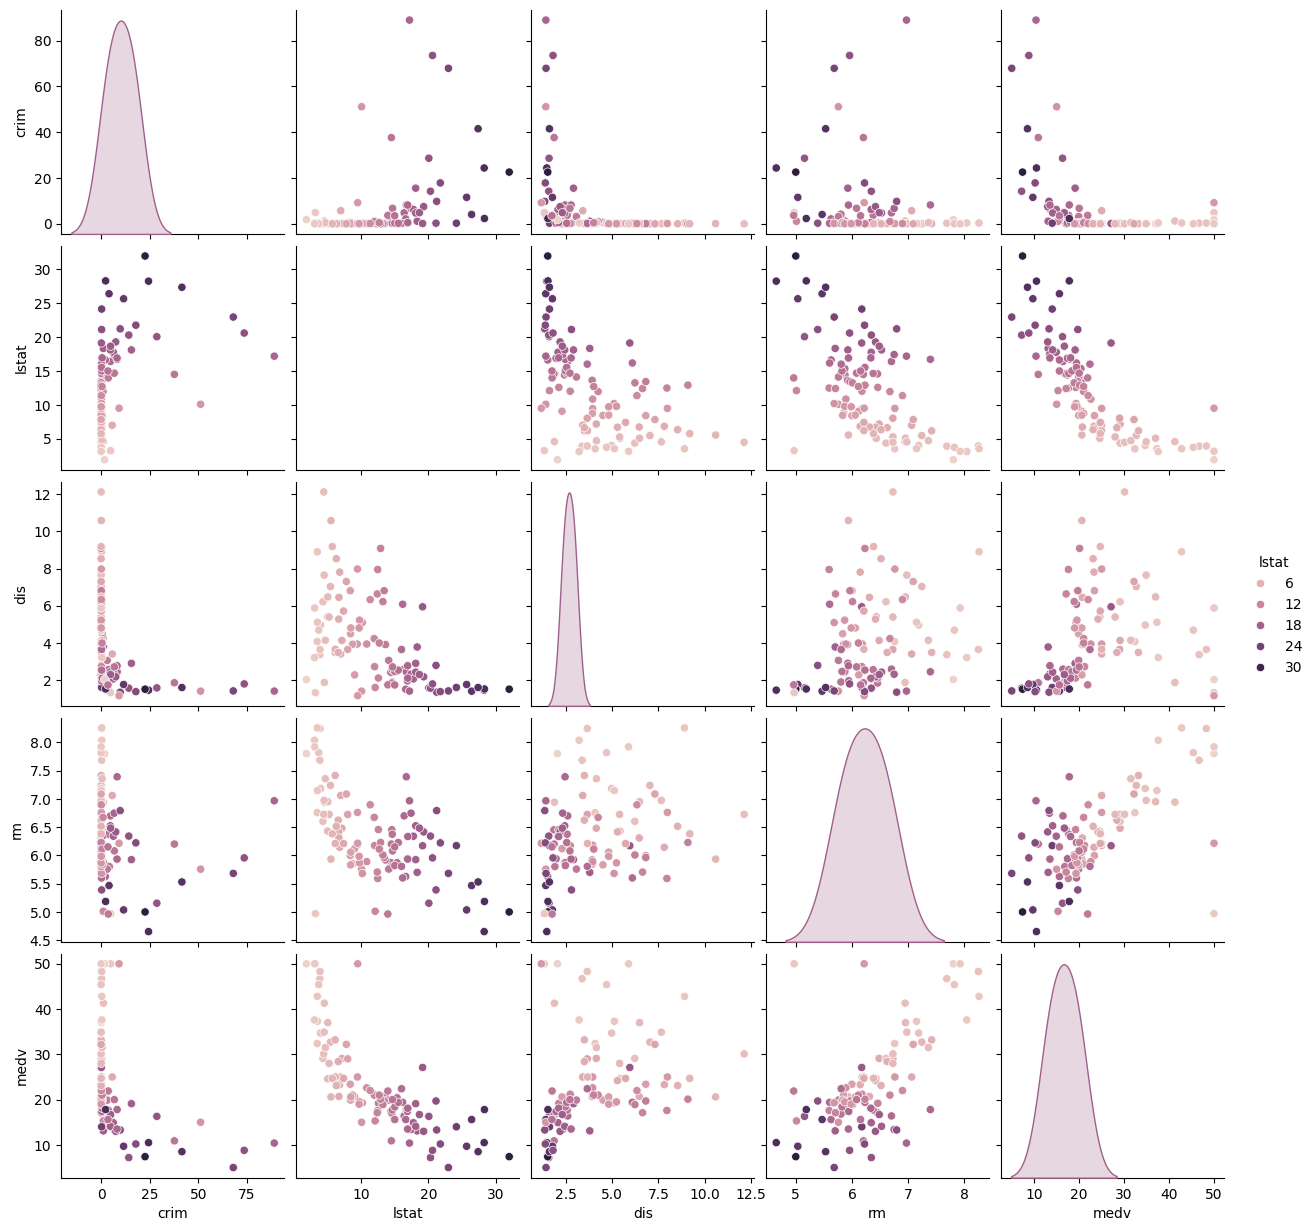

In [35]:
sns.pairplot(pd.concat([X_test, y_test], axis=1), vars=["crim", "lstat", "dis", "rm", "medv"], hue="lstat")

## Simple linear regression 

In [ ]:
## Demo Bias Variance Tradeoff 
1. filter training data - will introduce bias error
2. more flexible model will introduce variance error
3. a simple model with less number of features will also introduce bias error. 